### AI Bauchi 6 Weeks Computer Vision Bootcamp

<div style="display: flex; justify-content: space-evenly; align-items: center; width: 100%;">
<img src="../../logos\aib.png" width='100px'/>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQeyMRtudTwUIhRHGT1VKvVbnRYTu8VaQtaHg&s" width='100px'/>
<img src="https://miro.medium.com/v2/resize:fit:800/0*qa3Uh-1JZUhCuBVK.png" width='100px'/>
</div>

---

### Week 3: Deep Learning Basics for Computer Vision

#### Session 8: Artificial Neural Networks (ANNs)

In this session, we will delve into Artificial Neural Networks (ANNs), the fundamental building blocks of deep learning. Understanding ANNs is crucial as they form the basis for more complex architectures like Convolutional Neural Networks (CNNs) and Recurrent Neural Networks (RNNs).

##### **What is an Artificial Neural Network?**

An Artificial Neural Network (ANN) is a computational model inspired by the way biological neural networks in the human brain process information. ANNs consist of interconnected nodes, or neurons, organized into layers. These layers work together to transform input data into meaningful output through a series of mathematical operations.

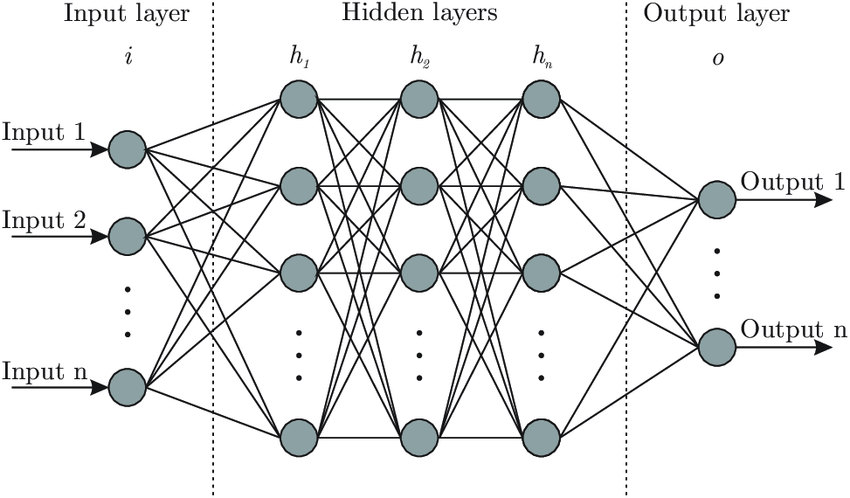

##### **ANN Architecture**

1. **Input Layer:** This layer receives the initial data. Each neuron in this layer represents a feature in the input data.
2. **Hidden Layers:** These intermediate layers perform computations to detect patterns and features. The number of hidden layers and neurons in each layer can vary, impacting the network's ability to learn complex patterns.
3. **Output Layer:** This layer produces the final prediction or classification result. The number of neurons in this layer corresponds to the number of output classes or regression values.

##### **Key Components of ANNs**

1. **Neurons:** Basic units that receive input, apply a weighted sum, add a bias, and pass the result through an activation function.
2. **Weights and Biases:** Parameters that the network learns during training to minimize error. Weights adjust the input's influence, while biases shift the activation function.
3. **Activation Functions:** Functions like ReLU (Rectified Linear Unit), Sigmoid, and Tanh introduce non-linearity, allowing the network to learn complex patterns.

##### **Introduction to TensorFlow and Keras**

TensorFlow and Keras are two of the most popular frameworks for building and training deep learning models. They simplify the process of creating neural networks and offer powerful tools for model development and deployment.

**TensorFlow:**
- Developed by Google, TensorFlow is an open-source library for numerical computation and machine learning.
- It provides comprehensive tools and libraries to build and train models, including support for neural networks, optimization, and deployment.
- TensorFlow is highly scalable, making it suitable for both research and production environments.

**Keras:**
- Keras is an open-source neural network library written in Python, which runs on top of TensorFlow.
- It offers a user-friendly, high-level interface for building and training deep learning models.
- Keras simplifies the process of designing and implementing complex neural networks with its intuitive API.



# Building a Simple ANN with TensorFlow/Keras

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
from sklearn.preprocessing import StandardScaler
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Build the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # Output layer for regression

In [ ]:
model.summary()

In [ ]:
from tensorflow import keras

In [ ]:
import pydot
keras.utils.plot_model(model)

In [ ]:
w ,b = model.layers[1].get_weights()

In [ ]:
w

In [ ]:
# Number of Parameters
model.count_params()

In [ ]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='sgd')

In [ ]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_data=(X_test_scaled, y_test))

In [ ]:
from keras.datasets import fashion_mnist

In [ ]:
## Load Fashion Mnist data
(X_train, y_train), (X_test,y_test) = fashion_mnist.load_data()

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [ ]:
plt.imshow(X_train[10])

In [ ]:
y_train[0]

In [ ]:
className = {0 :'T-shirt/top',
              1: 'Trouser',
              2: 'Pullover',
              3: 'Dress',
              4: 'Coat',
              5: 'Sandal',
              6: 'Shirt',
              7: 'Sneaker',
              8: 'Bag',
              9: 'Ankle boot'}

In [ ]:
X_train = X_train_n[:50000]
y_valid = y_train[50000:]
y_train = y_train[:50000]
X_valid = X_train_n[50000:]

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics = ['accuracy'])

In [ ]:
model_history = model.fit(X_train, y_train, epochs = 30, validation_data=(X_valid, y_valid))

In [ ]:
pd.DataFrame(model_history.history).plot(figsize=(12,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.evaluate(X_test/255, y_test)

In [ ]:
import numpy as np
sample_image = X_test[0]
sample_image = np.expand_dims(sample_image, axis=0)

In [ ]:
prediction = model.predict(sample_image)
predicted_label = np.argmax(prediction)

In [ ]:
# Show class probabilities
class_probabilities = model.predict(sample_image)
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
probabilities = {}